<a href="https://www.kaggle.com/code/dalepeh/pizza-sales-analysis?scriptVersionId=115533932" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mavern-pizza-challenge-pizza-typereadable-version/new-jersey_PH-ver1.csv
/kaggle/input/mavern-pizza-challenge-pizza-typereadable-version/pizza_types-updated-readable-ver.csv
/kaggle/input/maven-pizza-challenge-dataset/pizza_types.csv
/kaggle/input/maven-pizza-challenge-dataset/data_dictionary.csv
/kaggle/input/maven-pizza-challenge-dataset/orders.csv
/kaggle/input/maven-pizza-challenge-dataset/order_details.csv
/kaggle/input/maven-pizza-challenge-dataset/pizzas.csv


# Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Load and combine datasets into 1 single dataframe

In [3]:
data_dict = pd.read_csv('/kaggle/input/maven-pizza-challenge-dataset/data_dictionary.csv')

In [4]:
data_dict

,Table,Field,Description
0,orders,order_id,Unique identifier for each order placed by a t...
1,orders,date,Date the order was placed (entered into the sy...
2,orders,time,Time the order was placed (entered into the sy...
3,order_details,order_details_id,Unique identifier for each pizza placed within...
4,order_details,order_id,Foreign key that ties the details in each orde...
5,order_details,pizza_id,Foreign key that ties the pizza ordered to its...
6,order_details,quantity,Quantity ordered for each pizza of the same ty...
7,pizzas,pizza_id,Unique identifier for each pizza (constituted ...
8,pizzas,pizza_type_id,Foreign key that ties each pizza to its broade...
9,pizzas,size,"Size of the pizza (Small, Medium, Large, X Lar..."


In [5]:
order_details = pd.read_csv('/kaggle/input/maven-pizza-challenge-dataset/order_details.csv')

In [6]:
order_details

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1
...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1
48616,48617,21348,four_cheese_l,1
48617,48618,21348,napolitana_s,1
48618,48619,21349,mexicana_l,1


In [7]:
#drop order_details_id

order_details.drop('order_details_id', axis=1, inplace=True)

In [8]:
order_details.head(5)

,order_id,pizza_id,quantity
0,1,hawaiian_m,1
1,2,classic_dlx_m,1
2,2,five_cheese_l,1
3,2,ital_supr_l,1
4,2,mexicana_m,1


In [9]:
orders = pd.read_csv('/kaggle/input/maven-pizza-challenge-dataset/orders.csv')

In [10]:
orders

,order_id,date,time
0,1,01/01/2015,11:38:36
1,2,01/01/2015,11:57:40
2,3,01/01/2015,12:12:28
3,4,01/01/2015,12:16:31
4,5,01/01/2015,12:21:30
...,...,...,...
21345,21346,31/12/2015,20:51:07
21346,21347,31/12/2015,21:14:37
21347,21348,31/12/2015,21:23:10
21348,21349,31/12/2015,22:09:54


In [11]:
# Map date and time to order details

order_details_1 = order_details.merge(orders, left_on='order_id',right_on='order_id').reindex(columns=['order_id', 'date', 'time', 'pizza_id', 'quantity'])

In [12]:
order_details_1

,order_id,date,time,pizza_id,quantity
0,1,01/01/2015,11:38:36,hawaiian_m,1
1,2,01/01/2015,11:57:40,classic_dlx_m,1
2,2,01/01/2015,11:57:40,five_cheese_l,1
3,2,01/01/2015,11:57:40,ital_supr_l,1
4,2,01/01/2015,11:57:40,mexicana_m,1
...,...,...,...,...,...
48615,21348,31/12/2015,21:23:10,ckn_alfredo_m,1
48616,21348,31/12/2015,21:23:10,four_cheese_l,1
48617,21348,31/12/2015,21:23:10,napolitana_s,1
48618,21349,31/12/2015,22:09:54,mexicana_l,1


In [13]:
pizzas = pd.read_csv('/kaggle/input/maven-pizza-challenge-dataset/pizzas.csv')

In [14]:
pizzas.head(10)

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75
5,cali_ckn_l,cali_ckn,L,20.75
6,ckn_alfredo_s,ckn_alfredo,S,12.75
7,ckn_alfredo_m,ckn_alfredo,M,16.75
8,ckn_alfredo_l,ckn_alfredo,L,20.75
9,ckn_pesto_s,ckn_pesto,S,12.75


### Convert pizza_types into Dictionary to Map to the main Dataframe

The dataframe of pizza_type has different rows then the main one, instead of direct merging the values, a dictionary is created to map into the main dataframe. 


In [15]:
#convert dataframe pizzas into dictionary

pizza_dict=pizzas.set_index('pizza_id').to_dict('series')

In [16]:
# Map pizza_type_id to dataframe

order_details_1['pizza_type'] = order_details_1['pizza_id'].map(pizza_dict['pizza_type_id']).astype(str)

#Map size to dataframe

order_details_1['size'] = order_details_1['pizza_id'].map(pizza_dict['size']).astype(str)

#Map Price to dataframe

order_details_1['price'] = order_details_1['pizza_id'].map(pizza_dict['price']).astype(float)

In [17]:
order_details_1.head(5)

,order_id,date,time,pizza_id,quantity,pizza_type,size,price
0,1,01/01/2015,11:38:36,hawaiian_m,1,hawaiian,M,13.25
1,2,01/01/2015,11:57:40,classic_dlx_m,1,classic_dlx,M,16.00
2,2,01/01/2015,11:57:40,five_cheese_l,1,five_cheese,L,18.50
3,2,01/01/2015,11:57:40,ital_supr_l,1,ital_supr,L,20.75
4,2,01/01/2015,11:57:40,mexicana_m,1,mexicana,M,16.00


In [18]:
#check if the values have the correct Dtype
order_details_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48620 entries, 0 to 48619
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   order_id    48620 non-null  int64  
 1   date        48620 non-null  object 
 2   time        48620 non-null  object 
 3   pizza_id    48620 non-null  object 
 4   quantity    48620 non-null  int64  
 5   pizza_type  48620 non-null  object 
 6   size        48620 non-null  object 
 7   price       48620 non-null  float64
dtypes: float64(1), int64(2), object(5)
memory usage: 3.3+ MB


There are no null values in the data

### Create another dictionary to display category of pizzas 

In [19]:
pizza_cat = pd.read_csv('/kaggle/input/mavern-pizza-challenge-pizza-typereadable-version/pizza_types-updated-readable-ver.csv')

In [20]:
#convert pizza_cat into dictionary. Note that this time we turn it into series orientation

cat_dict=pizza_cat.set_index('pizza_type_id').to_dict('series')

In [21]:
cat_dict

{'name': pizza_type_id
 bbq_ckn                         The Barbecue Chicken Pizza
 cali_ckn                      The California Chicken Pizza
 ckn_alfredo                      The Chicken Alfredo Pizza
 ckn_pesto                          The Chicken Pesto Pizza
 southw_ckn                     The Southwest Chicken Pizza
 thai_ckn                            The Thai Chicken Pizza
 big_meat                                The Big Meat Pizza
 classic_dlx                       The Classic Deluxe Pizza
 hawaiian                                The Hawaiian Pizza
 ital_cpcllo                    The Italian Capocollo Pizza
 napolitana                            The Napolitana Pizza
 pep_msh_pep     The Pepperoni, Mushroom, and Peppers Pizza
 pepperoni                              The Pepperoni Pizza
 the_greek                                  The Greek Pizza
 brie_carre                            The Brie Carre Pizza
 calabrese                              The Calabrese Pizza
 ital_supr       

In [22]:
order_details_1['category'] = order_details_1['pizza_type'].map(cat_dict['category']).astype(str)

In [23]:
order_details_1.head(5)

,order_id,date,time,pizza_id,quantity,pizza_type,size,price,category
0,1,01/01/2015,11:38:36,hawaiian_m,1,hawaiian,M,13.25,Classic
1,2,01/01/2015,11:57:40,classic_dlx_m,1,classic_dlx,M,16.00,Classic
2,2,01/01/2015,11:57:40,five_cheese_l,1,five_cheese,L,18.50,Veggie
3,2,01/01/2015,11:57:40,ital_supr_l,1,ital_supr,L,20.75,Supreme
4,2,01/01/2015,11:57:40,mexicana_m,1,mexicana,M,16.00,Veggie


# Feature Engineering

1. Add Day name into data
2. Add Month name into the data
3. Add new column with sales amount (quantity * price)

The following is the data structure diagram of how the data is transformed structured into various tables.

![Data Structure Diagram](https://lhprojectportfolio.w3spaces.com/images/pizza_table_schemaDiagram.jpg?bypass-cache=24780645)

#### 1. Add Day Name

In [24]:
# Convert the date into datetime format. 

order_details_1['date'] = pd.to_datetime(order_details_1['date'])

# Add day name to the data

order_details_1['day_name'] = order_details_1['date'].dt.day_name()

#### 2. Add Month Name

In [25]:
# Add month name to the data

order_details_1['month_name'] = order_details_1['date'].dt.month_name()

#### 3. Create a orderhour Column

Other than looking at day, month we also want to see which timing of the operating hours have the most customers.


In [26]:
#convert to time format and extract only the hour

order_details_1['orderhour'] = pd.to_datetime(order_details_1['time'], format='%H:%M:%S').dt.hour

In [27]:
order_details_1.head(10)

,order_id,date,time,pizza_id,quantity,pizza_type,size,price,category,day_name,month_name,orderhour
0,1,2015-01-01,11:38:36,hawaiian_m,1,hawaiian,M,13.25,Classic,Thursday,January,11
1,2,2015-01-01,11:57:40,classic_dlx_m,1,classic_dlx,M,16.00,Classic,Thursday,January,11
2,2,2015-01-01,11:57:40,five_cheese_l,1,five_cheese,L,18.50,Veggie,Thursday,January,11
3,2,2015-01-01,11:57:40,ital_supr_l,1,ital_supr,L,20.75,Supreme,Thursday,January,11
4,2,2015-01-01,11:57:40,mexicana_m,1,mexicana,M,16.00,Veggie,Thursday,January,11
5,2,2015-01-01,11:57:40,thai_ckn_l,1,thai_ckn,L,20.75,Chicken,Thursday,January,11
6,3,2015-01-01,12:12:28,ital_supr_m,1,ital_supr,M,16.50,Supreme,Thursday,January,12
7,3,2015-01-01,12:12:28,prsc_argla_l,1,prsc_argla,L,20.75,Supreme,Thursday,January,12
8,4,2015-01-01,12:16:31,ital_supr_m,1,ital_supr,M,16.50,Supreme,Thursday,January,12
9,5,2015-01-01,12:21:30,ital_supr_m,1,ital_supr,M,16.50,Supreme,Thursday,January,12


#### 3. Add a New sales_amount Column 

This column is [quantity] x [price]

In [28]:
order_details_1['sales_amount'] = order_details_1['quantity'] * order_details_1['price']

In [29]:
order_details_1.head(5)

,order_id,date,time,pizza_id,quantity,pizza_type,size,price,category,day_name,month_name,orderhour,sales_amount
0,1,2015-01-01,11:38:36,hawaiian_m,1,hawaiian,M,13.25,Classic,Thursday,January,11,13.25
1,2,2015-01-01,11:57:40,classic_dlx_m,1,classic_dlx,M,16.00,Classic,Thursday,January,11,16.00
2,2,2015-01-01,11:57:40,five_cheese_l,1,five_cheese,L,18.50,Veggie,Thursday,January,11,18.50
3,2,2015-01-01,11:57:40,ital_supr_l,1,ital_supr,L,20.75,Supreme,Thursday,January,11,20.75
4,2,2015-01-01,11:57:40,mexicana_m,1,mexicana,M,16.00,Veggie,Thursday,January,11,16.00


#### 4. Add New Jersey Public Holidays

In [30]:
ph = pd.read_csv('/kaggle/input/mavern-pizza-challenge-pizza-typereadable-version/new-jersey_PH-ver1.csv')

In [31]:
ph

,date,holiday_name,day_type
0,1/1/2015,New Year's Day,PH
1,1/19/2015,Martin Luther King Jr.'s Birthday,PH
2,2/16/2015,Presidents' Day,PH
3,4/3/2015,Good Friday,PH
4,5/25/2015,Memorial Day,PH
5,7/3/2015,Independence Day,PH
6,9/7/2015,Labor Day,PH
7,10/12/2015,Columbus Day,PH
8,11/3/2015,Election Day,PH
9,11/11/2015,Veteran's Day,PH


In [32]:
# Convert date into datetime format

ph['date'] = pd.to_datetime(ph['date'])

In [33]:
#convert ph into dictionary

ph_dict = ph.set_index('date').to_dict('series')

ph_dict

{'holiday_name': date
 2015-01-01                        New Year's Day
 2015-01-19     Martin Luther King Jr.'s Birthday
 2015-02-16                       Presidents' Day
 2015-04-03                           Good Friday
 2015-05-25                          Memorial Day
 2015-07-03                      Independence Day
 2015-09-07                             Labor Day
 2015-10-12                          Columbus Day
 2015-11-03                          Election Day
 2015-11-11                         Veteran's Day
 2015-11-26                      Thanksgiving Day
 2015-12-25                         Christmas Day
 Name: holiday_name, dtype: object,
 'day_type': date
 2015-01-01     PH
 2015-01-19     PH
 2015-02-16     PH
 2015-04-03     PH
 2015-05-25     PH
 2015-07-03     PH
 2015-09-07     PH
 2015-10-12     PH
 2015-11-03     PH
 2015-11-11     PH
 2015-11-26     PH
 2015-12-25     PH
 Name: day_type, dtype: object}

In [34]:
# add holiday_name

order_details_1['holiday_name'] = order_details_1['date'].map(ph_dict['holiday_name'])

#add day_type

order_details_1['day_type'] = order_details_1['date'].map(ph_dict['day_type'])

In [35]:
order_details_1

,order_id,date,time,pizza_id,quantity,pizza_type,size,price,category,day_name,month_name,orderhour,sales_amount,holiday_name,day_type
0,1,2015-01-01,11:38:36,hawaiian_m,1,hawaiian,M,13.25,Classic,Thursday,January,11,13.25,New Year's Day,PH
1,2,2015-01-01,11:57:40,classic_dlx_m,1,classic_dlx,M,16.00,Classic,Thursday,January,11,16.00,New Year's Day,PH
2,2,2015-01-01,11:57:40,five_cheese_l,1,five_cheese,L,18.50,Veggie,Thursday,January,11,18.50,New Year's Day,PH
3,2,2015-01-01,11:57:40,ital_supr_l,1,ital_supr,L,20.75,Supreme,Thursday,January,11,20.75,New Year's Day,PH
4,2,2015-01-01,11:57:40,mexicana_m,1,mexicana,M,16.00,Veggie,Thursday,January,11,16.00,New Year's Day,PH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48615,21348,2015-12-31,21:23:10,ckn_alfredo_m,1,ckn_alfredo,M,16.75,Chicken,Thursday,December,21,16.75,NaN,NaN
48616,21348,2015-12-31,21:23:10,four_cheese_l,1,four_cheese,L,17.95,Veggie,Thursday,December,21,17.95,NaN,NaN
48617,21348,2015-12-31,21:23:10,napolitana_s,1,napolitana,S,12.00,Classic,Thursday,December,21,12.00,NaN,NaN
48618,21349,2015-12-31,22:09:54,mexicana_l,1,mexicana,L,20.25,Veggie,Thursday,December,22,20.25,NaN,NaN


In [36]:
#Add OD in the fields with NaN values to indicate that it is an Ordinary Day(OD)

holiday_incl = order_details_1.fillna('OD')

In [37]:
holiday_incl

,order_id,date,time,pizza_id,quantity,pizza_type,size,price,category,day_name,month_name,orderhour,sales_amount,holiday_name,day_type
0,1,2015-01-01,11:38:36,hawaiian_m,1,hawaiian,M,13.25,Classic,Thursday,January,11,13.25,New Year's Day,PH
1,2,2015-01-01,11:57:40,classic_dlx_m,1,classic_dlx,M,16.00,Classic,Thursday,January,11,16.00,New Year's Day,PH
2,2,2015-01-01,11:57:40,five_cheese_l,1,five_cheese,L,18.50,Veggie,Thursday,January,11,18.50,New Year's Day,PH
3,2,2015-01-01,11:57:40,ital_supr_l,1,ital_supr,L,20.75,Supreme,Thursday,January,11,20.75,New Year's Day,PH
4,2,2015-01-01,11:57:40,mexicana_m,1,mexicana,M,16.00,Veggie,Thursday,January,11,16.00,New Year's Day,PH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48615,21348,2015-12-31,21:23:10,ckn_alfredo_m,1,ckn_alfredo,M,16.75,Chicken,Thursday,December,21,16.75,OD,OD
48616,21348,2015-12-31,21:23:10,four_cheese_l,1,four_cheese,L,17.95,Veggie,Thursday,December,21,17.95,OD,OD
48617,21348,2015-12-31,21:23:10,napolitana_s,1,napolitana,S,12.00,Classic,Thursday,December,21,12.00,OD,OD
48618,21349,2015-12-31,22:09:54,mexicana_l,1,mexicana,L,20.25,Veggie,Thursday,December,22,20.25,OD,OD


In [38]:
holiday_incl.value_counts('holiday_name').reset_index(name='quantity_sold')

,holiday_name,quantity_sold
0,OD,47037
1,Thanksgiving Day,261
2,New Year's Day,161
3,Good Friday,144
4,Independence Day,139
5,Martin Luther King Jr.'s Birthday,139
6,Labor Day,133
7,Election Day,132
8,Memorial Day,122
9,Columbus Day,118


In [39]:
holiday_incl.loc[holiday_incl['date']=='2015-12-25']

,order_id,date,time,pizza_id,quantity,pizza_type,size,price,category,day_name,month_name,orderhour,sales_amount,holiday_name,day_type


The biggest sales for holiday is Thanksgiving Day with 261 pizza orders made.

The restaurant is closed on Christmas Day

# Exploratory Data Analysis of Mavern Pizza

Making sense of the dataset. 

**1. Descriptive**
   * General Descriptive
   * Total Annual Sales
   * Sales by order_id
   * Sales by Month
   
**2. Visualization**
   * Pizzas Popularity
   * Popular Size
   * Popularity by Category
   * Pizza Sold by Hour
   * Pizza Sold by Week
   * Pizza Sales by Month

**3. Deep Dive into Sales Figure**
   * Difference in Holiday / Ordinary Day Sales 

### 1. Descriptive

**a. General Descriptive**

In [40]:
order_details_1.describe()

,order_id,quantity,price,orderhour,sales_amount
count,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000
mean,10701.479761,1.019622,16.494132,15.911806,16.821474
std,6180.119770,0.143077,3.621789,3.149836,4.437398
min,1.000000,1.000000,9.750000,9.000000,9.750000
25%,5337.000000,1.000000,12.750000,13.000000,12.750000
50%,10682.500000,1.000000,16.500000,16.000000,16.500000
75%,16100.000000,1.000000,20.250000,18.000000,20.500000
max,21350.000000,4.000000,35.950000,23.000000,83.000000


The average price of pizza is $16.50

Most customer ordered the $16.50 price range of the pizzas

Cheapest pizza price is $9.75 (Pepperoni Pizza - Small)

The most expensive pizza is $35.95 (The Greek Pizza _ XXL)


--

**b. Total Annual Sales**

In [41]:
order_details_1['sales_amount'].sum()

817860.05

**Total Sales made in 2015:**
#### **$817,860.05**

----

**c. Sales by order_id**

In [42]:
order_total = order_details_1.groupby('order_id')['sales_amount'].sum().reset_index(name='total_amount')

order_total.describe()

,order_id,total_amount
count,21350.000000,21350.000000
mean,10675.500000,38.307262
std,6163.358459,30.648197
min,1.000000,9.750000
25%,5338.250000,17.950000
50%,10675.500000,32.500000
75%,16012.750000,49.500000
max,21350.000000,444.200000


The mean average spending per bill is $38.31 

Median spending amount is $32.50 per bill which works out about 2 pizzas per order. 

Maximum amount spend is $444.20


----

**d. Sales by Month**

In [43]:
#Total sales amount per month

monthly_sales = order_details_1.groupby('month_name')['sales_amount'].sum().reset_index(name='total_amount')

monthly_sales.describe()

,total_amount
count,12.000000
mean,68155.004167
std,3403.510911
min,61058.100000
25%,66841.462500
50%,68829.375000
75%,70911.700000
max,71620.150000


**Highest sales** is recorded in **January** at **$71,620.15**

**Average Monthly Sales** in 2015 is **$68,155**

**Lowest sales** is **$61,058**

### 2. Visualization

#### 2.1 Pizzas Popularity

Text(0.5, 1.05, 'Top 5 Pizza')

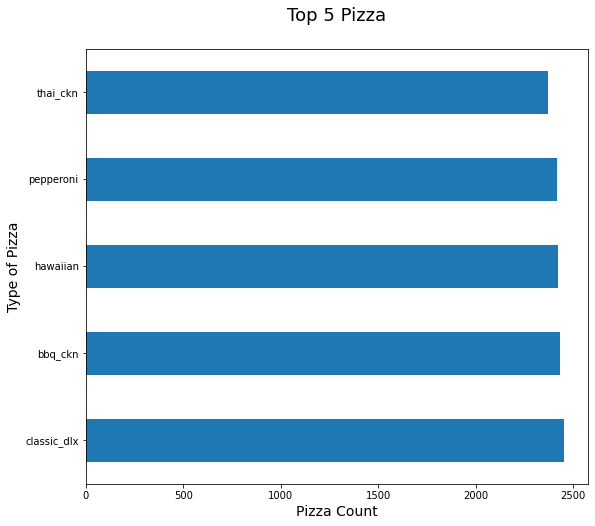

In [44]:
pizza_popularity = order_details_1.groupby('pizza_type')['quantity'].sum().sort_values(ascending=False)

#Top 5 Pizza
pizza_popularity[:5].plot(kind='barh', figsize=(9, 8))
plt.xlabel("Pizza Count", size=14)
plt.ylabel("Type of Pizza", size=14)
plt.title("Top 5 Pizza", size= 18, y=1.05)

In [45]:
order_details_1.groupby('pizza_type')['quantity'].sum().sort_values(ascending=False).reset_index(name='quantity_sold')

,pizza_type,quantity_sold
0,classic_dlx,2453
1,bbq_ckn,2432
2,hawaiian,2422
3,pepperoni,2418
4,thai_ckn,2371
5,cali_ckn,2370
6,sicilian,1938
7,spicy_ital,1924
8,southw_ckn,1917
9,big_meat,1914


Text(0.5, 1.05, 'Bottom 5 Pizza')

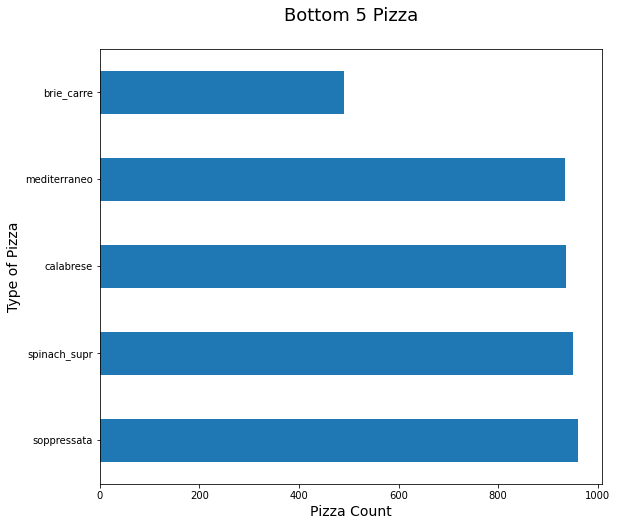

In [46]:
#Top 5 Pizza
pizza_popularity[27:32].plot(kind='barh', figsize=(9, 8))
plt.xlabel("Pizza Count", size=14)
plt.ylabel("Type of Pizza", size=14)
plt.title("Bottom 5 Pizza", size= 18, y=1.05)

#### Best Selling Pizza

The **best selling pizza** is **Classic_Deluxe** with 2453 pieces sold in a year

#### Least Selling Pizza

**Least popular pizza** is Brie Carre with only 490 pieces sold in a year

#### 2.2 Most Popular Size

Text(0.5, 1.05, 'Most Popular Size')

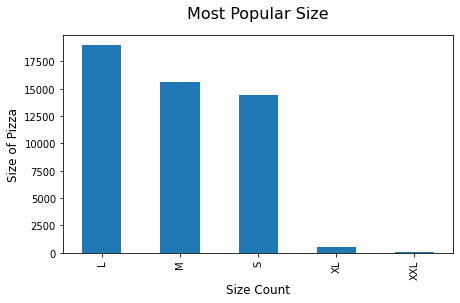

In [47]:
order_details_1.groupby('size')['quantity'].sum().plot(kind='bar', figsize=(7, 4))
plt.xlabel("Size Count", size=12)
plt.ylabel("Size of Pizza", size=12)
plt.title("Most Popular Size", size=16, y=1.05)

#### 2.3 Popularity by Catgory

Text(0.5, 1.05, 'Most Popular by Category')

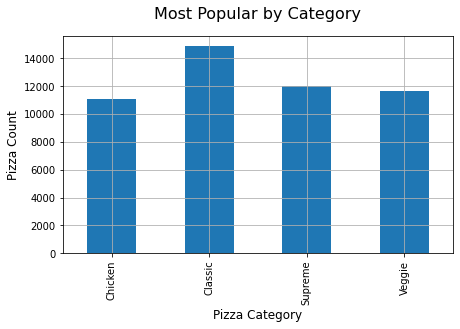

In [48]:
order_details_1.groupby('category')['quantity'].sum().plot(kind='bar', figsize =(7, 4))

plt.grid()
plt.xlabel("Pizza Category", size=12)
plt.ylabel("Pizza Count", size=12)
plt.title("Most Popular by Category", size=16, y=1.05)

Classic range pizzas being the most popular, followed by Supreme and Veggie. Chicken is least popular category for the pizzas ordered.

Although some of the top 10 pizzas are chicken, the chicken category is lesser than the others. As such, it shows least ordered category

#### 2.4 Total Pizza Sold by Hour

Text(0.5, 1.05, 'Timing by Order Count')

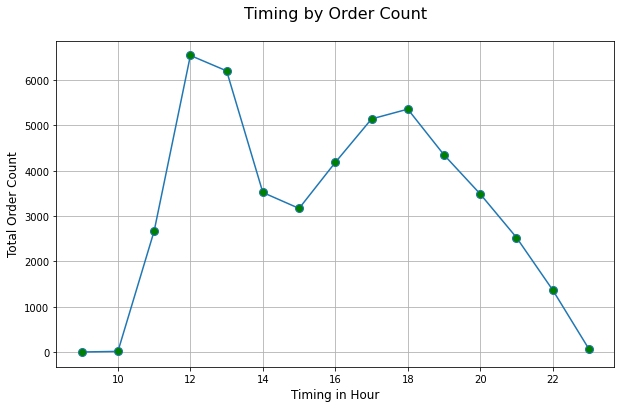

In [49]:
order_details_1['orderhour'].value_counts().sort_index(ascending=True).plot(kind="line", marker='o', markerfacecolor='green', markersize=8, figsize=(10, 6))

plt.grid()

plt.xlabel("Timing in Hour", size=12)
plt.ylabel("Total Order Count", size=12)
plt.title("Timing by Order Count", size=16, y=1.05)

The busiest hours is usually at lunch time from 12am - 1pm. 

Crowd picked up again around 5pm onwards for dinner and slows down after 8pm

The peak hour is 12 noon - 1pm where restaurant will be operating at its maximum capacity. 

#### 2.5 Sales of Pizza by Days of the Week

Text(0.5, 1.05, 'Sales of Pizza by Day of the Week')

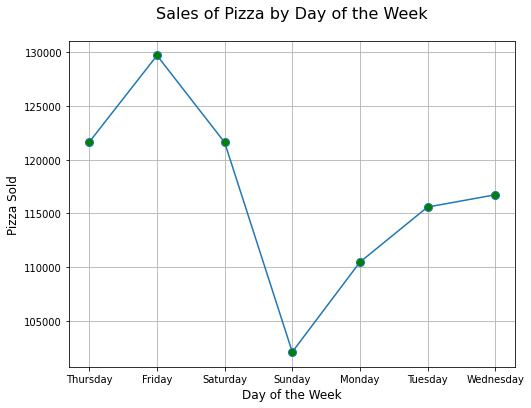

In [50]:
order_details_1.groupby('day_name')['sales_amount'].sum().reindex(
    pd.Series(pd.date_range("01-01-2015", freq="D", periods=7)).dt.strftime("%A")
).plot(kind='line', marker='o', markerfacecolor='green', markersize=8, figsize=(8, 6))

plt.grid()

plt.xlabel("Day of the Week", size=12)
plt.ylabel("Pizza Sold", size=12)
plt.title("Sales of Pizza by Day of the Week", size=16, y=1.05)

Sales **climbed** steadily from **Monday to Friday** and **declined** to the **lowest on Sunday.**

#### 2.6 Total Sales of Pizza Sold by Month

Text(0.5, 1.05, 'Total Sales Pizza by Month')

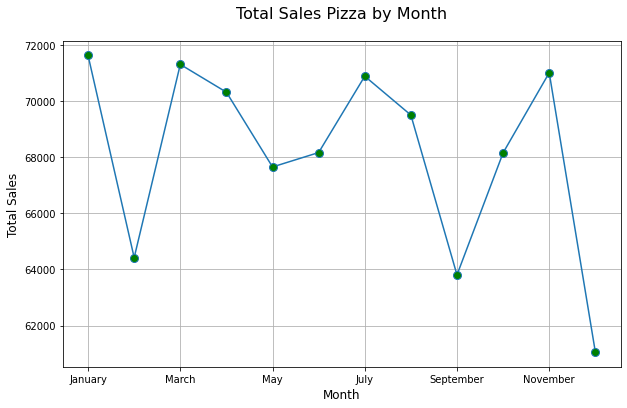

In [51]:
order_details_1.groupby('month_name')['sales_amount'].sum().reindex(
    pd.Series(pd.date_range("01-01-2015", freq="M", periods=12)).dt.strftime("%B")
).plot(kind="line", marker='o', markerfacecolor='green', markersize=8, figsize=(10, 6))

plt.grid()
plt.xlabel("Month", size=12)
plt.ylabel("Total Sales", size=12)
plt.title("Total Sales Pizza by Month", size=16, y=1.05)

Highest Monthly Sales usually coincides with Major Holidays in US. 

**1. January - New Year's Day**

**2. March - Easter Day**

**3. July - Independence Day**

**4. Novermber - Thanksgiving Day,Election Day and Veteran's Day**

*However, it is noted that December Christmas the restaurant is closed and it is the lowest number of pizzas sold for the entire year. Perhaps lower sales is also because people going back their hometown / vacation during year end.*

<span style="color:red"><b>OR IS IT REALLT SO??? </b></span>.
    
**We shall find out more about the sales trend in next section**



## 3. Deep Dive in Sales Figures

In this section, we are going to analyse in details the sales of ordinary days and holidays. 

**Question:** 
Does the restuarant make more during public holidays? 

### 3.1 A Look at Pulic Holiday Sales

Text(0.5, 1.05, 'Total Sales Pizza by Public Holiday')

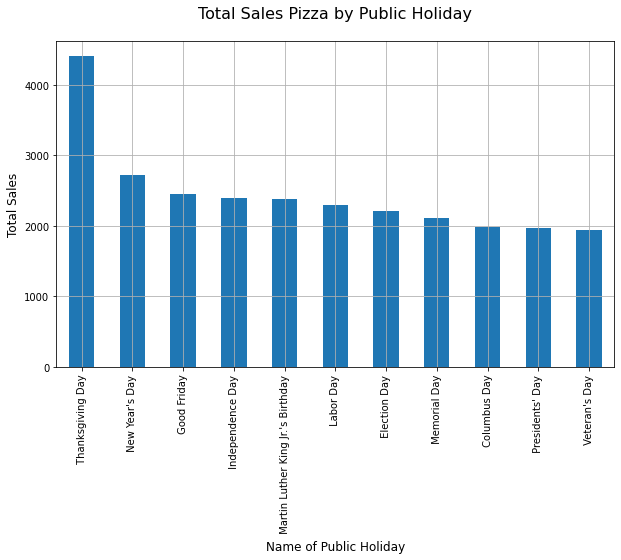

In [52]:
order_details_1.groupby('holiday_name')['sales_amount'].sum().sort_values(ascending=False).plot(kind="bar", figsize=(10, 6))

plt.grid()
plt.xlabel("Name of Public Holiday", size=12)
plt.ylabel("Total Sales", size=12)
plt.title("Total Sales Pizza by Public Holiday", size=16, y=1.05)

In [53]:
order_details_1.groupby('holiday_name')['sales_amount'].sum().sort_values(ascending=False).reset_index(name='total_sales')

,holiday_name,total_sales
0,Thanksgiving Day,4405.95
1,New Year's Day,2713.85
2,Good Friday,2444.30
3,Independence Day,2400.45
4,Martin Luther King Jr.'s Birthday,2387.15
5,Labor Day,2297.75
6,Election Day,2207.70
7,Memorial Day,2104.40
8,Columbus Day,1985.60
9,Presidents' Day,1968.80


Best holiday sales is Thanksgiving Day at $4405.95.

Worst performing holiday sales is Veteran's Day with only $1946.20 take-in

### 3.2 Add Sales Pivot Table - sales_pivot Dataframe

In [54]:
# Create a new pivot table with sum () 

sales_pivot = order_details_1.groupby(['month_name', 'day_name']).sum()

In [55]:
sales_pivot

# sales_pivot is a pivot table with MultiIndex (month_name, day_name group as index)

order_id  quantity     price  orderhour  sales_amount
month_name day_name                                                        
April      Friday      4777198       611  10056.90       9611      10241.35
           Monday      4033811       569   9295.55       8586       9420.05
           Saturday    4814877       554   8913.30       8968       9109.05
           Sunday      5814750       523   8293.90       8177       8462.60
           Thursday    5781786       750  12105.80      11588      12306.45
...                        ...       ...       ...        ...           ...
September  Saturday    8543409       584   9203.35       9325       9473.35
           Sunday      6856358       502   8269.40       7956       8424.40
           Thursday    5052006       423   6945.70       6692       7089.20
           Tuesday     8696959       705  11360.20      10989      11612.65
           Wednesday   8857917       692  11143.55      10661      11321.75

[84 rows x 5 columns]

In [56]:
# Drop order_id, price, orderhour as the sum() for these values are not relevant

sales_pivot.drop(columns = ['order_id', 'price', 'orderhour'], inplace=True)

In [57]:
sales_pivot.head()

quantity  sales_amount
month_name day_name                        
April      Friday         611      10241.35
           Monday         569       9420.05
           Saturday       554       9109.05
           Sunday         523       8462.60
           Thursday       750      12306.45

### 3.3 Create a Restuarant Open Day Count - 'op_day_count' DataFrame

In [58]:
#Create a table call op_day_count from order_details_1. 
#Intention of this is to count the number of day_name in a month that the restaurant is open

op_day_count = order_details_1[['date', 'month_name', 'day_name']]

op_day_count

,date,month_name,day_name
0,2015-01-01,January,Thursday
1,2015-01-01,January,Thursday
2,2015-01-01,January,Thursday
3,2015-01-01,January,Thursday
4,2015-01-01,January,Thursday
...,...,...,...
48615,2015-12-31,December,Thursday
48616,2015-12-31,December,Thursday
48617,2015-12-31,December,Thursday
48618,2015-12-31,December,Thursday


In [59]:
#remove duplicates to only have single unique value for the date

op_day_count = op_day_count.drop_duplicates()

In [60]:
op_day_count

,date,month_name,day_name
0,2015-01-01,January,Thursday
161,2015-02-01,February,Sunday
321,2015-03-01,March,Sunday
475,2015-04-01,April,Wednesday
581,2015-05-01,May,Friday
...,...,...,...
48110,2015-12-27,December,Sunday
48197,2015-12-28,December,Monday
48299,2015-12-29,December,Tuesday
48376,2015-12-30,December,Wednesday


In [61]:
op_day_count['month_name'].value_counts().sort_values(ascending=True)

February     28
September    28
October      29
December     29
April        30
May          30
June         30
November     30
January      31
March        31
July         31
August       31
Name: month_name, dtype: int64

In [62]:
order_details_1.loc[order_details_1['date']=='2015-05-10']

,order_id,date,time,pizza_id,quantity,pizza_type,size,price,category,day_name,month_name,orderhour,sales_amount,holiday_name,day_type


<span style="color:red"><b>Missing day of the Month</b></span>

Notice from month value_count, May, Sept, Oct, Dec do not tally with the calendar count.

Restaurant closed on the following days of the Month:

- May 10 (Sun) - 1 Day
- Sept 24(Thurs),  25(Fri) - 2 Days
- Oct 19 (Mon), 26 (Mon) - 2 Days
- Dec 10 (Thurs), 25 (Fri) - 2 Days

Reference to 2.6 [Total Sales of Pizza by Month] With the exception of February that has only 28 days, May, Sept, Oct and Dec are the months with lowest sales.

Hence the average monthly sales is consistent to the number of days that the restaurant opened

In [63]:
order_details_1.groupby('month_name')['sales_amount'].sum().sort_values(ascending=True).reset_index(name='total_sales')

,month_name,total_sales
0,December,61058.10
1,September,63803.70
2,February,64419.45
3,May,67648.80
4,October,68152.20
5,June,68161.45
6,August,69497.30
7,April,70312.00
8,July,70880.65
9,November,71004.85


In [64]:
# Create a dictionary / list from sales_count 
# so that we can get the day_count from the sales_count

day_count_dict=op_day_count.groupby('month_name')['day_name'].value_counts()
day_count_dict

month_name  day_name 
April       Thursday     5
            Wednesday    5
            Friday       4
            Monday       4
            Saturday     4
                        ..
September   Monday       4
            Saturday     4
            Sunday       4
            Friday       3
            Thursday     3
Name: day_name, Length: 84, dtype: int64

In [65]:
#turn day_count_dict into a dataframe 

day_count = pd.DataFrame(day_count_dict)

day_count

day_name
month_name day_name           
April      Thursday          5
           Wednesday         5
           Friday            4
           Monday            4
           Saturday          4
...                        ...
September  Monday            4
           Saturday          4
           Sunday            4
           Friday            3
           Thursday          3

[84 rows x 1 columns]

In [66]:
#rename the column day_name (value_count) into day_count

day_count.rename(columns = {'day_name':'day_count'}, inplace = True)

In [67]:
day_count

day_count
month_name day_name            
April      Thursday           5
           Wednesday          5
           Friday             4
           Monday             4
           Saturday           4
...                         ...
September  Monday             4
           Saturday           4
           Sunday             4
           Friday             3
           Thursday           3

[84 rows x 1 columns]

### 3.4 Create a Public Holiday Count Pivot Table - ph_count DataFrame

In [68]:
#We start by importing the fields into public_hols

public_hols = holiday_incl[['date', 'month_name', 'day_name', 'day_type']]

public_hols

,date,month_name,day_name,day_type
0,2015-01-01,January,Thursday,PH
1,2015-01-01,January,Thursday,PH
2,2015-01-01,January,Thursday,PH
3,2015-01-01,January,Thursday,PH
4,2015-01-01,January,Thursday,PH
...,...,...,...,...
48615,2015-12-31,December,Thursday,OD
48616,2015-12-31,December,Thursday,OD
48617,2015-12-31,December,Thursday,OD
48618,2015-12-31,December,Thursday,OD


In [69]:
#remove non-word characters in day_type

public_hols['day_type'] = public_hols['day_type'].str.replace('\W', '', regex=True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [70]:
#drop duplicates

public_hols = public_hols.drop_duplicates()

In [71]:
#use get_dummies to get the public holiday day count

ph=pd.get_dummies(public_hols, columns=['day_type'])
ph

,date,month_name,day_name,day_type_OD,day_type_PH
0,2015-01-01,January,Thursday,0,1
161,2015-02-01,February,Sunday,1,0
321,2015-03-01,March,Sunday,1,0
475,2015-04-01,April,Wednesday,1,0
581,2015-05-01,May,Friday,1,0
...,...,...,...,...,...
48110,2015-12-27,December,Sunday,1,0
48197,2015-12-28,December,Monday,1,0
48299,2015-12-29,December,Tuesday,1,0
48376,2015-12-30,December,Wednesday,1,0


In [72]:
#drop columns 'date', 'day_type_OD'

ph.drop(columns = ['date', 'day_type_OD'], inplace=True)


#remove duplicate day_name of the month

ph = ph.drop_duplicates()

In [73]:
ph

,month_name,day_name,day_type_PH
0,January,Thursday,1
161,February,Sunday,0
321,March,Sunday,0
475,April,Wednesday,0
581,May,Friday,0
...,...,...,...
34760,September,Monday,0
38018,November,Tuesday,0
41927,November,Wednesday,1
43882,November,Thursday,1


In [74]:
ph.set_index(['month_name', 'day_name'], inplace=True)

In [75]:
ph.sort_index(inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:6402: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  key,


In [76]:
ph

day_type_PH
month_name day_name              
April      Friday               1
           Friday               0
           Monday               0
           Saturday             0
           Sunday               0
...                           ...
September  Saturday             0
           Sunday               0
           Thursday             0
           Tuesday              0
           Wednesday            0

[95 rows x 1 columns]

In [77]:
ph_1=ph.reset_index()

In [78]:
ph_1

,month_name,day_name,day_type_PH
0,April,Friday,1
1,April,Friday,0
2,April,Monday,0
3,April,Saturday,0
4,April,Sunday,0
...,...,...,...
90,September,Saturday,0
91,September,Sunday,0
92,September,Thursday,0
93,September,Tuesday,0


Note that there are 95 rows instead of 84 rows from the 2 earlier pivot tables. This is because there are duplicates from ordinary day count (index 0 and 1)

In [79]:
#Drop ordinary day count entries

ph_2=ph_1.drop(ph_1.index[[1, 23, 32, 36, 40, 62, 73, 76, 77, 80, 89]])

In [80]:
ph_2

,month_name,day_name,day_type_PH
0,April,Friday,1
2,April,Monday,0
3,April,Saturday,0
4,April,Sunday,0
5,April,Thursday,0
...,...,...,...
90,September,Saturday,0
91,September,Sunday,0
92,September,Thursday,0
93,September,Tuesday,0


In [81]:
#add sales figure for all holidays

ph_2.insert(3, 'ph_sales_amt', 0)


In [82]:
ph_2

,month_name,day_name,day_type_PH,ph_sales_amt
0,April,Friday,1,0
2,April,Monday,0,0
3,April,Saturday,0,0
4,April,Sunday,0,0
5,April,Thursday,0,0
...,...,...,...,...
90,September,Saturday,0,0
91,September,Sunday,0,0
92,September,Thursday,0,0
93,September,Tuesday,0,0


In [83]:
# Add sales figure for all public holidays

ph_2.loc[0, ['ph_sales_amt']]=[2444.3] #add sales Good Friday
ph_2.loc[24, ['ph_sales_amt']]=[1968.80] #add sales President's Day
ph_2.loc[31, ['ph_sales_amt']]=[2387.15] #add sales Martin Luther Jr BD
ph_2.loc[35, ['ph_sales_amt']]=[2713.85] #add sales New Year's Day
ph_2.loc[39, ['ph_sales_amt']]=[2400.45] #add sales Independence Day
ph_2.loc[63, ['ph_sales_amt']]=[2104.40] #add sales Memorial Day
ph_2.loc[74, ['ph_sales_amt']]=[4405.95] #add sales Thanksgiving Day 
ph_2.loc[75, ['ph_sales_amt']]=[2207.70] #add sales Election Day
ph_2.loc[78, ['ph_sales_amt']]=[1946.20] #add sales Veteran's Day
ph_2.loc[81, ['ph_sales_amt']]=[1985.60] #add sales Colombus Day
ph_2.loc[88, ['ph_sales_amt']]=[2297.75] #add sales Labour Day

In [84]:
#change ph_2 into a pivot table

ph_2.set_index(['month_name', 'day_name'], inplace=True)

In [85]:
ph_2

day_type_PH  ph_sales_amt
month_name day_name                            
April      Friday               1        2444.3
           Monday               0           0.0
           Saturday             0           0.0
           Sunday               0           0.0
           Thursday             0           0.0
...                           ...           ...
September  Saturday             0           0.0
           Sunday               0           0.0
           Thursday             0           0.0
           Tuesday              0           0.0
           Wednesday            0           0.0

[84 rows x 2 columns]

### 3.5 Merge [sales_pivot], [day_count], [ph_count] into [sales_period]

In [86]:
sales_p1 = pd.merge(sales_pivot, day_count, left_index=True, right_index=True)

In [87]:
sales_p1

quantity  sales_amount  day_count
month_name day_name                                    
April      Friday          611      10241.35          4
           Monday          569       9420.05          4
           Saturday        554       9109.05          4
           Sunday          523       8462.60          4
           Thursday        750      12306.45          5
...                        ...           ...        ...
September  Saturday        584       9473.35          4
           Sunday          502       8424.40          4
           Thursday        423       7089.20          3
           Tuesday         705      11612.65          5
           Wednesday       692      11321.75          5

[84 rows x 3 columns]

In [88]:
sales_period = pd.merge(sales_p1, ph_2, left_index=True, right_index=True)

In [89]:
sales_period

quantity  sales_amount  day_count  day_type_PH  \
month_name day_name                                                    
April      Friday          611      10241.35          4            1   
           Monday          569       9420.05          4            0   
           Saturday        554       9109.05          4            0   
           Sunday          523       8462.60          4            0   
           Thursday        750      12306.45          5            0   
...                        ...           ...        ...          ...   
September  Saturday        584       9473.35          4            0   
           Sunday          502       8424.40          4            0   
           Thursday        423       7089.20          3            0   
           Tuesday         705      11612.65          5            0   
           Wednesday       692      11321.75          5            0   

                      ph_sales_amt  
month_name day_name                 
April      Friday           2444.3  
           Monday              0.0  
           Saturday            0.0  
           Sunday              0.0  
           Thursday            0.0  
...                            ...  
September  Saturday            0.0  
           Sunday              0.0  
           Thursday            0.0  
           Tuesday             0.0  
           Wednesday           0.0  

[84 rows x 5 columns]

#### Average Sales for Ordinary Day

Taking out the holidays' sales. The average sales for ordinary days is calculated as follows: 

(total sales of day_name - holiday sales of day_name) / (ordinary day_cout - public holiday day_count)

In [90]:
sales_period['avg_day_sales'] = (sales_period['sales_amount'] - sales_period['ph_sales_amt']) / (sales_period['day_count'] - sales_period['day_type_PH'])

sales_period

quantity  sales_amount  day_count  day_type_PH  \
month_name day_name                                                    
April      Friday          611      10241.35          4            1   
           Monday          569       9420.05          4            0   
           Saturday        554       9109.05          4            0   
           Sunday          523       8462.60          4            0   
           Thursday        750      12306.45          5            0   
...                        ...           ...        ...          ...   
September  Saturday        584       9473.35          4            0   
           Sunday          502       8424.40          4            0   
           Thursday        423       7089.20          3            0   
           Tuesday         705      11612.65          5            0   
           Wednesday       692      11321.75          5            0   

                      ph_sales_amt  avg_day_sales  
month_name day_name                                
April      Friday           2444.3    2599.016667  
           Monday              0.0    2355.012500  
           Saturday            0.0    2277.262500  
           Sunday              0.0    2115.650000  
           Thursday            0.0    2461.290000  
...                            ...            ...  
September  Saturday            0.0    2368.337500  
           Sunday              0.0    2106.100000  
           Thursday            0.0    2363.066667  
           Tuesday             0.0    2322.530000  
           Wednesday           0.0    2264.350000  

[84 rows x 6 columns]

In [91]:
sales_period['avg_day_sales'].mean()

2279.2177182539685

Mean of Average day sales for ordinary day is almost similar to holiday sales.

#### Percentage diff from comparison of day sales average against holiday sales 

In [92]:
sales_var = order_details_1.groupby('holiday_name')['sales_amount'].sum().sort_values(ascending=False).reset_index(name='total_sales')

#add column avg_day_sales

sales_var.insert(2, 'mean_day_sales', 2279.22)

sales_var

,holiday_name,total_sales,mean_day_sales
0,Thanksgiving Day,4405.95,2279.22
1,New Year's Day,2713.85,2279.22
2,Good Friday,2444.30,2279.22
3,Independence Day,2400.45,2279.22
4,Martin Luther King Jr.'s Birthday,2387.15,2279.22
5,Labor Day,2297.75,2279.22
6,Election Day,2207.70,2279.22
7,Memorial Day,2104.40,2279.22
8,Columbus Day,1985.60,2279.22
9,Presidents' Day,1968.80,2279.22


In [93]:
#calculate the percentage

sales_var['percent_variance']=(sales_var['total_sales']-sales_var['mean_day_sales']) / sales_var['mean_day_sales'] * 100

In [94]:
sales_var

,holiday_name,total_sales,mean_day_sales,percent_variance
0,Thanksgiving Day,4405.95,2279.22,93.309553
1,New Year's Day,2713.85,2279.22,19.069243
2,Good Friday,2444.30,2279.22,7.242829
3,Independence Day,2400.45,2279.22,5.318925
4,Martin Luther King Jr.'s Birthday,2387.15,2279.22,4.735392
5,Labor Day,2297.75,2279.22,0.812997
6,Election Day,2207.70,2279.22,-3.137916
7,Memorial Day,2104.40,2279.22,-7.670168
8,Columbus Day,1985.60,2279.22,-12.882477
9,Presidents' Day,1968.80,2279.22,-13.619572


The only significant sales increase are New Year's Day and Thanksgiving Day. Some of the holidays performed even worse than ordinary day sales 

#### Ordinary Day Sales Info

In [95]:
sales_period_1 = sales_period.reset_index()

In [96]:
sales_period_1

,month_name,day_name,quantity,sales_amount,day_count,day_type_PH,ph_sales_amt,avg_day_sales
0,April,Friday,611,10241.35,4,1,2444.3,2599.016667
1,April,Monday,569,9420.05,4,0,0.0,2355.012500
2,April,Saturday,554,9109.05,4,0,0.0,2277.262500
3,April,Sunday,523,8462.60,4,0,0.0,2115.650000
4,April,Thursday,750,12306.45,5,0,0.0,2461.290000
...,...,...,...,...,...,...,...,...
79,September,Saturday,584,9473.35,4,0,0.0,2368.337500
80,September,Sunday,502,8424.40,4,0,0.0,2106.100000
81,September,Thursday,423,7089.20,3,0,0.0,2363.066667
82,September,Tuesday,705,11612.65,5,0,0.0,2322.530000


In [97]:
sales_period_1['avg_day_sales'].min()

1850.33

In [98]:
sales_period_1.loc[sales_period_1['avg_day_sales']<1851]

,month_name,day_name,quantity,sales_amount,day_count,day_type_PH,ph_sales_amt,avg_day_sales
66,November,Sunday,565,9251.65,5,0,0.0,1850.33


November Sundays have the least average_day_sales

In [99]:
sales_period_1['avg_day_sales'].max()

2931.4

In [100]:
sales_period_1.loc[sales_period_1['avg_day_sales']>2931]

,month_name,day_name,quantity,sales_amount,day_count,day_type_PH,ph_sales_amt,avg_day_sales
63,November,Friday,711,11725.6,4,0,0.0,2931.4


November Fridays have the most average_day_sales